In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [320]:
train = pd.read_csv('C:/Users/LENOVO/Downloads/Train_hMYJ020/train.csv')
test = pd.read_csv('C:/Users/LENOVO/Downloads/Test_ND2Q3bm/test.csv')

In [312]:
train['flag'] = 1
test['flag'] = 0
test['Stay'] = None

data = pd.concat((train, test))
print(data.shape)

(455495, 19)


In [241]:
df1 = data.copy()

In [ ]:
data = df1.copy()

In [258]:
df2 = train[['Hospital_code', 'Hospital_type_code', 'Ward_Facility_Code', 'Hospital_region_code', 'Stay']]

In [259]:
for col in df2.columns:
    print(df2[col].value_counts())

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64
a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64
F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100             

In [260]:
col1 = ['Hospital_region_code', 'Ward_Facility_Code', 'Hospital_type_code','Stay']
for col in col1:
    df2[col] = le.fit_transform(df2[col])

In [261]:
for col in df2.columns:
    print(df2[col].value_counts())

26    33076
23    26566
19    21219
6     20425
11    17328
14    17328
28    17137
27    14244
9     11510
29    11311
12    11297
32    10703
25     9834
10     9435
15     9257
21     8150
24     7992
3      7116
17     5501
5      5261
1      5249
13     5236
2      5102
30     5002
22     4277
31     3967
16     3671
8      3663
18     3630
20     1405
7      1306
4      1240
Name: Hospital_code, dtype: int64
0    143425
1     68946
2     45928
4     24770
3     20389
5     10703
6      4277
Name: Hospital_type_code, dtype: int64
5    112753
4     55351
3     51809
2     35463
1     35156
0     27906
Name: Ward_Facility_Code, dtype: int64
0    133336
1    122428
2     62674
Name: Hospital_region_code, dtype: int64
2     87491
1     78139
3     55159
5     35018
0     23604
4     11743
7     10254
10     6683
8      4838
9      2765
6      2744
Name: Stay, dtype: int64


In [262]:
df2.corr()

,Hospital_code,Hospital_type_code,Ward_Facility_Code,Hospital_region_code,Stay
Hospital_code,1.000000,0.039449,-0.132347,-0.135920,0.042846
Hospital_type_code,0.039449,1.000000,-0.265768,0.268962,0.058592
Ward_Facility_Code,-0.132347,-0.265768,1.000000,-0.507350,-0.004552
Hospital_region_code,-0.135920,0.268962,-0.507350,1.000000,0.011905
Stay,0.042846,0.058592,-0.004552,0.011905,1.000000


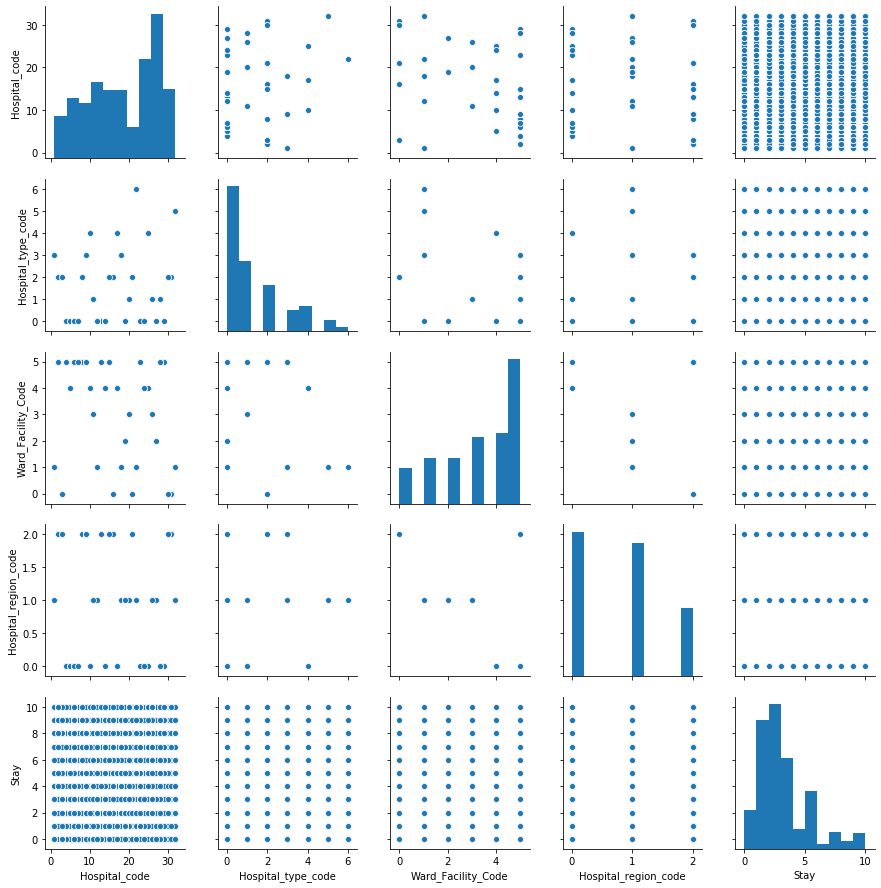

In [265]:
#import seaborn as sns
sns.pairplot(df2)

In [266]:
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif
from matplotlib import pyplot

Feature 0: 2837.293810
Feature 1: 2539.508961
Feature 2: 464.789493
Feature 3: 389.916507


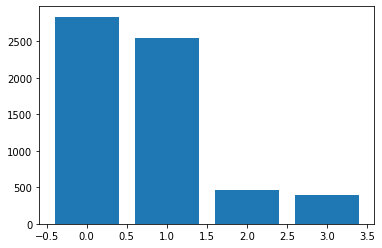

In [264]:
X = df2.iloc[:,:-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.026291
Feature 1: 0.011013
Feature 2: 0.014859
Feature 3: 0.003955


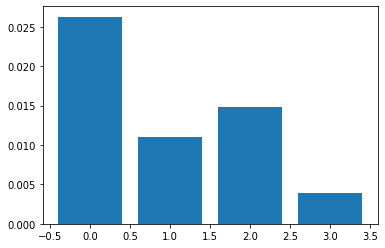

In [268]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [221]:
data.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Stay,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type,case_id,flag,patientid
0,4911.0,51-60,3,2.0,3,7.0,radiotherapy,8,Z,c,Extreme,0-10,Emergency,2,F,R,1,1,31397
1,5954.0,51-60,2,2.0,5,7.0,radiotherapy,2,Z,c,Extreme,41-50,Trauma,2,F,S,2,1,31397
2,4745.0,51-60,2,2.0,1,7.0,anesthesia,10,X,e,Extreme,31-40,Trauma,2,E,S,3,1,31397
3,7272.0,51-60,2,2.0,2,7.0,radiotherapy,26,Y,b,Extreme,41-50,Trauma,2,D,R,4,1,31397
4,5558.0,51-60,2,2.0,2,7.0,radiotherapy,26,Y,b,Extreme,41-50,Trauma,2,D,S,5,1,31397


In [271]:
data.drop(['case_id', 'patientid'], axis=1, inplace=True)

In [293]:
data.drop(['case_id'], axis=1, inplace=True)

In [313]:
data.loc[data['Age'] == '0-10', 'Age'] = 0
data.loc[data['Age'] == '11-20', 'Age'] = 1
data.loc[data['Age'] == '21-30', 'Age'] = 2
data.loc[data['Age'] == '31-40', 'Age'] = 3
data.loc[data['Age'] == '41-50', 'Age'] = 4
data.loc[data['Age'] == '51-60', 'Age'] = 5
data.loc[data['Age'] == '61-70', 'Age'] = 6
data.loc[data['Age'] == '71-80', 'Age'] = 7
data.loc[data['Age'] == '81-90', 'Age'] = 8
data.loc[data['Age'] == '91-100', 'Age'] = 9

In [315]:
need_to_encode = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']
for column in need_to_encode:
    le = LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column])

In [314]:
data.loc[data['Department'].eq('gynecology') & data['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
data.loc[data['Department'].eq('radiotherapy') & data['Bed Grade'].isnull(), 'Bed Grade'] = 2.0
data.loc[data['Department'].eq('TB & Chest disease') & data['Bed Grade'].isnull(), 'Bed Grade'] = 3.0
data.loc[data['Department'].eq('anesthesia') & data['Bed Grade'].isnull(), 'Bed Grade'] = 3.0

In [318]:
data.to_csv('data_use.csv', index=False)

In [121]:
train.apply(lambda x: sum(x.isnull()))

Admission_Deposit                    0
Age                                  0
Available Extra Rooms in Hospital    0
Bed Grade                            0
City_Code_Hospital                   0
City_Code_Patient                    0
Department                           0
Hospital_code                        0
Hospital_region_code                 0
Hospital_type_code                   0
Severity of Illness                  0
Stay                                 0
Type of Admission                    0
Visitors with Patient                0
Ward_Facility_Code                   0
Ward_Type                            0
flag                                 0
dtype: int64

In [347]:
train.loc[train['Stay'] == '0-10', 'Stay'] = 0
train.loc[train['Stay'] == '11-20', 'Stay'] = 1
train.loc[train['Stay'] == '21-30', 'Stay'] = 2
train.loc[train['Stay'] == '31-40', 'Stay'] = 3
train.loc[train['Stay'] == '41-50', 'Stay'] = 4
train.loc[train['Stay'] == '51-60', 'Stay'] = 5
train.loc[train['Stay'] == '61-70', 'Stay'] = 6
train.loc[train['Stay'] == '71-80', 'Stay'] = 7
train.loc[train['Stay'] == '81-90', 'Stay'] = 8
train.loc[train['Stay'] == '91-100', 'Stay'] = 9
train.loc[train['Stay'] == 'More than 100 Days', 'Stay'] = 10

In [71]:
df = data.copy()

In [ ]:
data = df.copy()

In [319]:
data.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Stay,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type,case_id,flag,patientid
0,4911.0,5,3,2.0,3,7.0,3,8,2,2,0,0-10,0,2,5,2,1,1,31397
1,5954.0,5,2,2.0,5,7.0,3,2,2,2,0,41-50,1,2,5,3,2,1,31397
2,4745.0,5,2,2.0,1,7.0,1,10,0,4,0,31-40,1,2,4,3,3,1,31397
3,7272.0,5,2,2.0,2,7.0,3,26,1,1,0,41-50,1,2,3,2,4,1,31397
4,5558.0,5,2,2.0,2,7.0,3,26,1,1,0,41-50,1,2,3,3,5,1,31397


In [316]:
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(8)

In [346]:
train, test = data[data.flag==1], data[data.flag==0]

In [374]:
categorical = ['Hospital_code', 'Hospital_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 
              'City_Code_Patient', 'Type of Admission', 'Severity of Illness']

In [304]:
target = train['Stay']
train.drop(['Stay'], axis=1, inplace=True)
test.drop(['Stay'], axis=1, inplace=True)

In [232]:
print(train.shape, test.shape)

(318438, 16) (137057, 16)


In [167]:
train.dtypes

Admission_Deposit                    float64
Age                                    int64
Available Extra Rooms in Hospital      int64
Bed Grade                            float64
City_Code_Hospital                     int64
City_Code_Patient                    float64
Department                             int32
Hospital_code                          int64
Hospital_region_code                   int32
Hospital_type_code                     int32
Severity of Illness                    int32
Type of Admission                      int32
Visitors with Patient                  int64
Ward_Facility_Code                     int32
Ward_Type                              int32
flag                                   int64
patientid                              int64
dtype: object

In [110]:
data['Stay'].head()

0    0
1    4
2    3
3    4
4    4
Name: Stay, dtype: object

In [300]:
train.drop(['flag'], axis=1, inplace=True)
test.drop(['flag'], axis=1, inplace=True)

In [377]:
X, X_val, y, y_val = train_test_split(train2, target, random_state=0, test_size=0.15, shuffle=True)

In [81]:
from sklearn.model_selection import train_test_split

In [170]:
model = lgb.LGBMClassifier(random_state=666)
model.fit(X, y, categorical_feature=categorical)
preds = model.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds)*100, '%')

LGBM accuracy:  42.82282376585856 %


Tuning hyperparameters

In [191]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [282]:
model1 = lgb.LGBMClassifier(random_state=1994)
#model.fit(X, y, categorical_feature=categorical)
#preds = model.predict(X_val)
#print('LGBM accuracy: ', accuracy_score(y_val, preds)*100, '%')

In [307]:
param_test = {'learning_rate':[0.05,0.06,0.08,0.1,0.2], 
             'max_depth':[20,40,30,50,70,80,100,150], 
             'n_estimators':[400, 500, 300],
             'min_data_in_leaf':[50,100,150,200,400],
             'colsample_bytree':[0.6,0.7,0.8,0.9,0.5], 
             'reg_alpha':[1.6, 1.4, 1.8, 2.0, 2.1, 2.2,1.2], 
             'reg_lambda':[1.0, 1.1, 1.2, 1.5, 1.8, 1.4,2.0], 
             'subsample':[0.6, 0.7, 0.8, 0.9]}

grid = RandomizedSearchCV(model1, param_test, verbose=10)
grid.fit(X, y)
print(grid.best_score_, '\n\n', grid.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8, score=0.426, total= 1.1min
[CV] subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8, score=0.425, total= 1.1min
[CV] subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.2min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1.5, reg_alpha=1.2, n_estimators=300, min_data_in_leaf=200, max_depth=80, learning_rate=0.05, colsample_bytree=0.8, score=0.419, total= 1.2min
[CV] subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.4min remaining:    0.0s


[CV]  subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6, score=0.427, total= 1.4min
[CV] subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.8min remaining:    0.0s


[CV]  subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6, score=0.426, total= 1.3min
[CV] subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.1min remaining:    0.0s


[CV]  subsample=0.9, reg_lambda=1.8, reg_alpha=2.1, n_estimators=400, min_data_in_leaf=200, max_depth=30, learning_rate=0.1, colsample_bytree=0.6, score=0.422, total= 1.3min
[CV] subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.3min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7, score=0.427, total= 1.4min
[CV] subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  8.7min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7, score=0.426, total= 1.4min
[CV] subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.1min remaining:    0.0s


[CV]  subsample=0.8, reg_lambda=1.2, reg_alpha=1.8, n_estimators=400, min_data_in_leaf=150, max_depth=70, learning_rate=0.06, colsample_bytree=0.7, score=0.421, total= 1.4min
[CV] subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.5min remaining:    0.0s


[CV]  subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5, score=0.426, total=  59.3s
[CV] subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5 
[CV]  subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5, score=0.425, total=  59.2s
[CV] subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5 
[CV]  subsample=0.9, reg_lambda=1.2, reg_alpha=2.1, n_estimators=300, min_data_in_leaf=400, max_depth=80, learning_rate=0.08, colsample_bytree=0.5, score=0.421, total=  59.7s
[CV] subsample=0.6, reg_lambda=2.0, reg_alpha=2.2, n_estimators=300, min_data_in_leaf=150, max_depth=80, learning_rate=0.06, colsample_bytree=0.5 
[CV]  subsample=0.6, reg_lambda=2.

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 38.8min finished


0.42560737719453806 

 {'subsample': 0.9, 'reg_lambda': 1.1, 'reg_alpha': 2.1, 'n_estimators': 400, 'min_data_in_leaf': 50, 'max_depth': 100, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [378]:
params_1 = {'learning_rate':0.1, 
             'max_depth':40, 
             'min_data_in_leaf':50,
             'n_estimators':400,
             'colsample_bytree':0.7, 
             'reg_alpha':2.1, 
             'reg_lambda':1.1, 
             'subsample':0.9,
            'random_state':1994}

model1 = lgb.LGBMClassifier(**params_1)
model1.fit(X, y, categorical_feature=categorical)
preds_1 = model1.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds_1)*100, '%')

LGBM accuracy:  27.20763723150358 %


In [309]:
pred_2 = model1.predict(test)
sub122 = pd.DataFrame({'case_id':test1.case_id, 'Stay':pred_2})
sub122.loc[sub122['Stay'] == 0, 'Stay'] = '0-10'
sub122.loc[sub122['Stay'] == 1, 'Stay'] = '11-20'
sub122.loc[sub122['Stay'] == 2, 'Stay'] = '21-30'
sub122.loc[sub122['Stay'] == 3, 'Stay'] = '31-40'
sub122.loc[sub122['Stay'] == 4, 'Stay'] = '41-50'
sub122.loc[sub122['Stay'] == 5, 'Stay'] = '51-60'
sub122.loc[sub122['Stay'] == 6, 'Stay'] = '61-70'
sub122.loc[sub122['Stay'] == 7, 'Stay'] = '71-80'
sub122.loc[sub122['Stay'] == 8, 'Stay'] = '81-90'
sub122.loc[sub122['Stay'] == 9, 'Stay'] = '91-100'
sub122.loc[sub122['Stay'] == 10, 'Stay'] = 'More than 100 Days'

sub122.to_csv('sub122.csv', index=False)

In [287]:
params_2 = {'learning_rate':0.05, 
             'max_depth':40, 
             'min_data_in_leaf':100,
             'n_estimators':500,
             'num_iterations':500,
             'colsample_bytree':0.6, 
             'reg_alpha':2.2, 
             'reg_lambda':2.0, 
             'subsample':0.9,
            'random_state':1994}

model2 = lgb.LGBMClassifier(**params_2)
model2.fit(X, y, categorical_feature=categorical)
preds_2 = model2.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds_2)*100, '%')

LGBM accuracy:  43.143658669346394 %


In [288]:
pred_1 = model1.predict(test)
sub121 = pd.DataFrame({'case_id':test1.case_id, 'Stay':pred_1})
sub121.loc[sub121['Stay'] == 0, 'Stay'] = '0-10'
sub121.loc[sub121['Stay'] == 1, 'Stay'] = '11-20'
sub121.loc[sub121['Stay'] == 2, 'Stay'] = '21-30'
sub121.loc[sub121['Stay'] == 3, 'Stay'] = '31-40'
sub121.loc[sub121['Stay'] == 4, 'Stay'] = '41-50'
sub121.loc[sub121['Stay'] == 5, 'Stay'] = '51-60'
sub121.loc[sub121['Stay'] == 6, 'Stay'] = '61-70'
sub121.loc[sub121['Stay'] == 7, 'Stay'] = '71-80'
sub121.loc[sub121['Stay'] == 8, 'Stay'] = '81-90'
sub121.loc[sub121['Stay'] == 9, 'Stay'] = '91-100'
sub121.loc[sub121['Stay'] == 10, 'Stay'] = 'More than 100 Days'

sub121.to_csv('sub121.csv', index=False)

In [217]:
params3 = {'learning_rate':0.08, 
             'max_depth':40, 
             'n_estimators':400, 
             'num_iterations':500,
             'colsample_bytree':0.8, 
             'reg_alpha':1.4, 
             'reg_lambda':1.2, 
             'subsample':0.6,
            'random_state':666}
model2 = lgb.LGBMClassifier(**params3)
model2.fit(X, y, categorical_feature=categorical)
preds3 = model2.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds3)*100, '%')

LGBM accuracy:  43.08189925888708 %


In [237]:
params2 = {'learning_rate':0.1, 
             'max_depth':20, 
             'n_estimators':400, 
             'colsample_bytree':0.7, 
             'reg_alpha':2.0, 
             'reg_lambda':1.0, 
             'subsample':0.6,
            'random_state':666}
model1 = lgb.LGBMClassifier(**params2)
model1.fit(X, y, categorical_feature=categorical)
preds2 = model1.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds2)*100, '%')

LGBM accuracy:  43.207511619143325 %


In [ ]:
params2 = {'learning_rate':0.1,
             'max_depth':20, 
             'n_estimators':400, 
             'colsample_bytree':0.7, 
             'reg_alpha':2.0, 
             'reg_lambda':1.0, 
             'subsample':0.6,
            'random_state':1994}
model1 = lgb.LGBMClassifier(**params2)
model1.fit(X, y, categorical_feature=categorical)
preds2 = model1.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds2)*100, '%')

In [238]:
pred5 = model1.predict(test)
sub12 = pd.DataFrame({'case_id':test1.case_id, 'Stay':pred5})
sub12.loc[sub12['Stay'] == 0, 'Stay'] = '0-10'
sub12.loc[sub12['Stay'] == 1, 'Stay'] = '11-20'
sub12.loc[sub12['Stay'] == 2, 'Stay'] = '21-30'
sub12.loc[sub12['Stay'] == 3, 'Stay'] = '31-40'
sub12.loc[sub12['Stay'] == 4, 'Stay'] = '41-50'
sub12.loc[sub12['Stay'] == 5, 'Stay'] = '51-60'
sub12.loc[sub12['Stay'] == 6, 'Stay'] = '61-70'
sub12.loc[sub12['Stay'] == 7, 'Stay'] = '71-80'
sub12.loc[sub12['Stay'] == 8, 'Stay'] = '81-90'
sub12.loc[sub12['Stay'] == 9, 'Stay'] = '91-100'
sub12.loc[sub12['Stay'] == 10, 'Stay'] = 'More than 100 Days'

sub12.to_csv('sub12.csv', index=False)

In [198]:
params2 = {'learning_rate':0.05, 
             'max_depth':30, 
             'n_estimators':400, 
             'colsample_bytree':0.7, 
             'reg_alpha':2.0, 
             'reg_lambda':1.8, 
             'subsample':0.7,
            'random_state':666}
model1 = lgb.LGBMClassifier(**params2)
model1.fit(X, y, categorical_feature=categorical)
preds2 = model1.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds2)*100, '%')

LGBM accuracy:  43.139994975505594 %


In [23]:
from sklearn.metrics import accuracy_score

In [199]:
pred3 = model1.predict(test)

In [201]:
len(pred3)

137057

In [202]:
pred3[:5]

array([0, 5, 2, 2, 5], dtype=int64)

In [42]:
test1 = pd.read_csv('C:/Users/LENOVO/Downloads/Test_ND2Q3bm/test.csv')

In [203]:
sub11 = pd.DataFrame({'case_id':test1.case_id, 'Stay':pred3})

In [28]:
test.columns

Index(['Admission_Deposit', 'Age', 'Available Extra Rooms in Hospital',
       'Bed Grade', 'City_Code_Hospital', 'City_Code_Patient', 'Department',
       'Hospital_code', 'Hospital_region_code', 'Hospital_type_code',
       'Severity of Illness', 'Type of Admission', 'Visitors with Patient',
       'Ward_Facility_Code', 'Ward_Type'],
      dtype='object')

In [132]:
sub8.head(10)

,case_id,Stay
0,318439,0
1,318440,5
2,318441,2
3,318442,2
4,318443,5
5,318444,2
6,318445,2
7,318446,1
8,318447,2
9,318448,2


In [204]:
sub11.loc[sub11['Stay'] == 0, 'Stay'] = '0-10'
sub11.loc[sub11['Stay'] == 1, 'Stay'] = '11-20'
sub11.loc[sub11['Stay'] == 2, 'Stay'] = '21-30'
sub11.loc[sub11['Stay'] == 3, 'Stay'] = '31-40'
sub11.loc[sub11['Stay'] == 4, 'Stay'] = '41-50'
sub11.loc[sub11['Stay'] == 5, 'Stay'] = '51-60'
sub11.loc[sub11['Stay'] == 6, 'Stay'] = '61-70'
sub11.loc[sub11['Stay'] == 7, 'Stay'] = '71-80'
sub11.loc[sub11['Stay'] == 8, 'Stay'] = '81-90'
sub11.loc[sub11['Stay'] == 9, 'Stay'] = '91-100'
sub11.loc[sub11['Stay'] == 10, 'Stay'] = 'More than 100 Days'

In [205]:
sub11.head(10)

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60
5,318444,21-30
6,318445,21-30
7,318446,11-20
8,318447,21-30
9,318448,21-30


In [206]:
sub11.to_csv('sub11.csv', index=False)

In [218]:
train.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type
0,4911.0,5,3,2.0,3,7.0,3,8,2,2,0,0,2,5,2
1,5954.0,5,2,2.0,5,7.0,3,2,2,2,0,1,2,5,3
2,4745.0,5,2,2.0,1,7.0,1,10,0,4,0,1,2,4,3
3,7272.0,5,2,2.0,2,7.0,3,26,1,1,0,1,2,3,2
4,5558.0,5,2,2.0,2,7.0,3,26,1,1,0,1,2,3,3


In [324]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
            
    # Only want the numeric variables
    parent_ids = df['patientid'].copy()
    numeric_df = df[['patientid', 'Hospital_code', 'Hospital_region_code', 'Ward_Facility_Code', 'Hospital_type_code']]
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby('patientid').agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [323]:
data.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Stay,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type,case_id,flag,patientid
0,4911.0,5,3,2.0,3,7.0,3,8,2,2,0,0-10,0,2,5,2,1,1,31397
1,5954.0,5,2,2.0,5,7.0,3,2,2,2,0,41-50,1,2,5,3,2,1,31397
2,4745.0,5,2,2.0,1,7.0,1,10,0,4,0,31-40,1,2,4,3,3,1,31397
3,7272.0,5,2,2.0,2,7.0,3,26,1,1,0,41-50,1,2,3,2,4,1,31397
4,5558.0,5,2,2.0,2,7.0,3,26,1,1,0,41-50,1,2,3,3,5,1,31397


In [325]:
train_1 = train.copy()

In [326]:
PID_aggregate = agg_numeric(train, 'patientid', 'agg')
print('PID aggregate shape: ', PID_aggregate.shape)
train=train.merge(PID_aggregate, on ='patientid', how = 'left')

PID aggregate shape:  (92017, 17)


In [329]:
train.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Stay,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type,case_id,flag,patientid,agg_Ward_Facility_Code_min,agg_Hospital_type_code_min,agg_Hospital_region_code_min,agg_Hospital_region_code_mean,agg_Ward_Facility_Code_mean,agg_Hospital_region_code_max,agg_Hospital_type_code_mean,agg_Ward_Facility_Code_max,agg_Hospital_code_min,agg_Hospital_code_count,agg_Hospital_region_code_sum,agg_Hospital_type_code_max,agg_Ward_Facility_Code_sum,agg_Hospital_type_code_sum,agg_Hospital_code_mean,agg_Hospital_code_max,agg_Hospital_code_sum
0,4911.0,5,3,2.0,3,7.0,3,8,2,2,0,0,0,2,5,2,1,1,31397,0,0,0,1.0,3.214286,2,2.428571,5,1,14,14,6,45,34,16.714286,32,234
1,5954.0,5,2,2.0,5,7.0,3,2,2,2,0,4,1,2,5,3,2,1,31397,0,0,0,1.0,3.214286,2,2.428571,5,1,14,14,6,45,34,16.714286,32,234
2,4745.0,5,2,2.0,1,7.0,1,10,0,4,0,3,1,2,4,3,3,1,31397,0,0,0,1.0,3.214286,2,2.428571,5,1,14,14,6,45,34,16.714286,32,234
3,7272.0,5,2,2.0,2,7.0,3,26,1,1,0,4,1,2,3,2,4,1,31397,0,0,0,1.0,3.214286,2,2.428571,5,1,14,14,6,45,34,16.714286,32,234
4,5558.0,5,2,2.0,2,7.0,3,26,1,1,0,4,1,2,3,3,5,1,31397,0,0,0,1.0,3.214286,2,2.428571,5,1,14,14,6,45,34,16.714286,32,234


In [328]:
pd.set_option('display.max_columns', None)

In [330]:
len(train['patientid'].unique())

92017

In [331]:
train.shape

(318438, 36)

In [351]:
traindf = train_1.groupby(['patientid', 'Hospital_code'])['Hospital_code'].count().to_frame()

In [352]:
traindf.head(20)

Hospital_code
patientid Hospital_code               
1         3                          1
          22                         1
          26                         1
          27                         1
2         11                         1
          21                         1
4         21                         1
          24                         1
6         30                         1
7         10                         1
          11                         1
          14                         1
          24                         1
9         19                         1
          26                         1
10        7                          1
          29                         1
13        25                         2
          28                         1
14        6                          1

In [353]:
traindf.rename(columns = {'Hospital_code':'Count'}, inplace=True)
traindf.reset_index(inplace=True)

In [354]:
traindf.head(20)

,patientid,Hospital_code,Count
0,1,3,1
1,1,22,1
2,1,26,1
3,1,27,1
4,2,11,1
5,2,21,1
6,4,21,1
7,4,24,1
8,6,30,1
9,7,10,1


In [355]:
traindf.shape

(274293, 3)

In [356]:
train.shape

(318438, 19)

In [362]:
len(traindf['patientid'].unique())

92017

In [363]:
len(train['patientid'].unique())

92017

In [367]:
train2 = pd.merge(train_1, traindf, on=['patientid','Hospital_code'], how='left')

In [368]:
train2.shape

(318438, 20)

In [369]:
train2.head()

,Admission_Deposit,Age,Available Extra Rooms in Hospital,Bed Grade,City_Code_Hospital,City_Code_Patient,Department,Hospital_code,Hospital_region_code,Hospital_type_code,Severity of Illness,Stay,Type of Admission,Visitors with Patient,Ward_Facility_Code,Ward_Type,case_id,flag,patientid,Count
0,4911.0,5,3,2.0,3,7.0,3,8,2,2,0,0,0,2,5,2,1,1,31397,1
1,5954.0,5,2,2.0,5,7.0,3,2,2,2,0,4,1,2,5,3,2,1,31397,1
2,4745.0,5,2,2.0,1,7.0,1,10,0,4,0,3,1,2,4,3,3,1,31397,2
3,7272.0,5,2,2.0,2,7.0,3,26,1,1,0,4,1,2,3,2,4,1,31397,3
4,5558.0,5,2,2.0,2,7.0,3,26,1,1,0,4,1,2,3,3,5,1,31397,3


In [373]:
target = train2['Stay']
train2.drop(['case_id', 'Stay', 'flag'], axis=1, inplace=True)
testdf = test.groupby(['patientid', 'Hospital_code'])['Hospital_code'].count().to_frame()
testdf.rename(columns = {'Hospital_code':'Count'}, inplace=True)
testdf.reset_index(inplace=True)
test2 = pd.merge(test, testdf, on=['patientid','Hospital_code'], how='left')
test.drop(['case_id', 'Stay', 'flag'], axis=1, inplace=True)
train2 = train2.sample(frac=1)
test2 = test2.sample(frac=1)

In [ ]:
params_2 = {'learning_rate':0.05, 
             'max_depth':40, 
             'min_data_in_leaf':100,
             'n_estimators':500,
             'num_iterations':500,
             'colsample_bytree':0.6, 
             'reg_alpha':2.2, 
             'reg_lambda':2.0, 
             'subsample':0.9,
            'random_state':1994}

model2 = lgb.LGBMClassifier(**params_2)
model2.fit(X, y, categorical_feature=categorical)
preds_2 = model2.predict(X_val)
print('LGBM accuracy: ', accuracy_score(y_val, preds_2)*100, '%')